In [1]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_columns)
    get_mean_percentage_error(act,

# <span style='color:green'> **[done]** </span> Exploratory Data Analysis

### <span style='color:green'> **[done]** </span> ufc_fighters_stats.csv exploration

In [2]:
loc = '../../web_scrapers/data/'
file1 = 'ufc_fighters_stats.csv'
df = pd.read_csv(loc+file1)
df.tail(3)

,name,wins,losses,draws,height,weight,reach,stance,dob,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_update,last_match,url
14169,Ray Wizard,0,1,0,--,--,--,NaN,--,0.0,0%,0.0,0%,0.0,0%,0%,0.0,04-18-2023,03-11-1994,http://ufcstats.com/fighter-details/ea0ad15545...
14170,Scott Morris,2,1,0,"5'10""",210lbs.,--,Orthodox,--,0.0,0%,0.0,0%,0.0,0%,0%,0.0,04-18-2023,03-11-1994,http://ufcstats.com/fighter-details/be9d259be0...
14171,Sean Daugherty,0,2,0,"6'0""",175lbs.,--,NaN,"Dec04,1975",0.0,0%,0.0,0%,0.0,0%,0%,0.0,04-18-2023,03-11-1994,http://ufcstats.com/fighter-details/a683f9ddb7...


## Column's Legend:
****
* <span style='color:blue'> **SLpM** </span> - Significant Strikes Landed per Minute
* <span style='color:blue'> **Str. Acc.** </span> - Significant Striking Accuracy
* <span style='color:blue'> **SApM** </span> - Significant Strikes Absorbed per Minute
* <span style='color:blue'> **Str. Def.** </span> - Significant Strike Defence (the % of opponents strikes that did not land)
* <span style='color:blue'> **TD Avg.** </span> - Average Takedowns Landed per 15 minutes
* <span style='color:blue'> **TD Acc.** </span> - Takedown Accuracy
* <span style='color:blue'> **TD Def.** </span> - Takedown Defense (the % of opponents TD attempts that did not land)
* <span style='color:blue'> **Sub. Avg.** </span> - Average Submissions Attempted per 15 minutes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14172 entries, 0 to 14171
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         14172 non-null  object 
 1   wins         14172 non-null  int64  
 2   losses       14172 non-null  int64  
 3   draws        14172 non-null  object 
 4   height       14172 non-null  object 
 5   weight       14172 non-null  object 
 6   reach        14172 non-null  object 
 7   stance       14055 non-null  object 
 8   dob          14172 non-null  object 
 9   slpm         14172 non-null  float64
 10  str_acc      14172 non-null  object 
 11  sapm         14172 non-null  float64
 12  str_def      14172 non-null  object 
 13  td_avg       14172 non-null  float64
 14  td_acc       14172 non-null  object 
 15  td_def       14172 non-null  object 
 16  sub_avg      14172 non-null  float64
 17  last_update  14172 non-null  object 
 18  last_match   13370 non-null  object 
 19  url 

### <span style='color:green'> **[done]** </span> height

In [4]:
for i in range(0,len(df['height'])):
    df.loc[i,'height'] = get_height(df.loc[i,'height']) 
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14172 entries, 0 to 14171
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         14172 non-null  object 
 1   wins         14172 non-null  int64  
 2   losses       14172 non-null  int64  
 3   draws        14172 non-null  object 
 4   height       14146 non-null  object 
 5   weight       14172 non-null  object 
 6   reach        14172 non-null  object 
 7   stance       14055 non-null  object 
 8   dob          14172 non-null  object 
 9   slpm         14172 non-null  float64
 10  str_acc      14172 non-null  object 
 11  sapm         14172 non-null  float64
 12  str_def      14172 non-null  object 
 13  td_avg       14172 non-null  float64
 14  td_acc       14172 non-null  object 
 15  td_def       14172 non-null  object 
 16  sub_avg      14172 non-null  float64
 17  last_update  14172 non-null  object 
 18  last_match   13370 non-null  object 
 19  url 

#### replacing null values with mean >

In [5]:
height_list = df['height'][df['height']!=None]
df.height = df.height.fillna(np.round(np.mean(height_list),2))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14172 entries, 0 to 14171
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         14172 non-null  object 
 1   wins         14172 non-null  int64  
 2   losses       14172 non-null  int64  
 3   draws        14172 non-null  object 
 4   height       14172 non-null  float64
 5   weight       14172 non-null  object 
 6   reach        14172 non-null  object 
 7   stance       14055 non-null  object 
 8   dob          14172 non-null  object 
 9   slpm         14172 non-null  float64
 10  str_acc      14172 non-null  object 
 11  sapm         14172 non-null  float64
 12  str_def      14172 non-null  object 
 13  td_avg       14172 non-null  float64
 14  td_acc       14172 non-null  object 
 15  td_def       14172 non-null  object 
 16  sub_avg      14172 non-null  float64
 17  last_update  14172 non-null  object 
 18  last_match   13370 non-null  object 
 19  url 

### <span style='color:green'> **[done]** </span> weight 

In [6]:
for i in range(0,len(df['weight'])):
    df.loc[i,'weight'] = get_weight(df.loc[i,'weight']) 
    
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14172 entries, 0 to 14171
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         14172 non-null  object 
 1   wins         14172 non-null  int64  
 2   losses       14172 non-null  int64  
 3   draws        14172 non-null  object 
 4   height       14172 non-null  float64
 5   weight       14150 non-null  object 
 6   reach        14172 non-null  object 
 7   stance       14055 non-null  object 
 8   dob          14172 non-null  object 
 9   slpm         14172 non-null  float64
 10  str_acc      14172 non-null  object 
 11  sapm         14172 non-null  float64
 12  str_def      14172 non-null  object 
 13  td_avg       14172 non-null  float64
 14  td_acc       14172 non-null  object 
 15  td_def       14172 non-null  object 
 16  sub_avg      14172 non-null  float64
 17  last_update  14172 non-null  object 
 18  last_match   13370 non-null  object 
 19  url 

#### drop fighters which weight is unknown> 

In [7]:
df = df[~df.weight.isna()].reset_index(drop=True)
df.tail(3)

,name,wins,losses,draws,height,weight,reach,stance,dob,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_update,last_match,url
14147,Patrick Smith,20,17,0,187.96,101.25,--,Orthodox,"Aug28,1963",0.0,0%,0.0,0%,0.0,0%,0%,0.0,04-18-2023,07-14-1995,http://ufcstats.com/fighter-details/46c8ec317a...
14148,Scott Morris,2,1,0,177.80,94.5,--,Orthodox,--,0.0,0%,0.0,0%,0.0,0%,0%,0.0,04-18-2023,03-11-1994,http://ufcstats.com/fighter-details/be9d259be0...
14149,Sean Daugherty,0,2,0,182.88,78.75,--,NaN,"Dec04,1975",0.0,0%,0.0,0%,0.0,0%,0%,0.0,04-18-2023,03-11-1994,http://ufcstats.com/fighter-details/a683f9ddb7...


### <span style='color:green'> **[done]** </span> Reach

In [8]:
df.reach.unique()

array(['69"', '70"', '75"', '71"', '76"', '65"', '67"', '73"', '72"',
       '68"', '66"', '77"', '63"', '80"', '79"', '74"', '81"', '62"',
       '61"', '64"', '78"', '84"', '82"', '58"', '83"', '59"', '60"',
       '--'], dtype=object)

In [9]:
for i in range(0,len(df['reach'])):
    df.loc[i,'reach'] = get_reach(df.loc[i,'reach']) 
    
df.head(3)   

,name,wins,losses,draws,height,weight,reach,stance,dob,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_update,last_match,url
0,Max Holloway,24,7,0,180.34,65.25,175.26,Orthodox,"Dec04,1991",7.16,47%,4.79,59%,0.28,53%,84%,0.3,04-17-2023,04-15-2023,http://ufcstats.com/fighter-details/150ff4cc64...
1,Arnold Allen,19,2,0,172.72,65.25,177.8,Southpaw,"Jan22,1994",3.34,40%,2.86,61%,1.12,50%,76%,0.3,04-17-2023,04-15-2023,http://ufcstats.com/fighter-details/040a74bb0a...
2,Edson Barboza,23,11,0,180.34,65.25,190.5,Orthodox,"Jan21,1986",4.00,44%,4.12,58%,0.38,44%,75%,0.1,04-17-2023,04-15-2023,http://ufcstats.com/fighter-details/64a50dad70...


#### replacing null values with "standard reach" ( =mean(reach/height)*height ) >

<AxesSubplot:xlabel='height', ylabel='reach'>

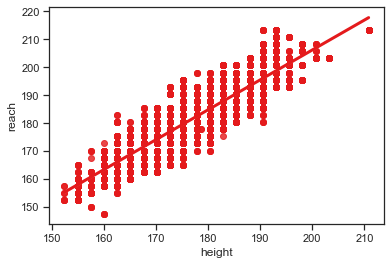

In [10]:
y = pd.to_numeric(df.reach[~df.reach.isna()])
x = pd.to_numeric(df.height[~df.reach.isna()])
sns.regplot(x=x, y=y)

In [11]:
null_indexs = df[df.reach.isna()].index

for i in null_indexs:
    df.loc[i, 'reach'] = get_std_reach(df.loc[i, 'reach'],df.loc[i,'height'], df['reach'], df['height']) 
    
print('Null changed: ' + str(len(null_indexs)))
df.info()   

Null changed: 1302
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         14150 non-null  object 
 1   wins         14150 non-null  int64  
 2   losses       14150 non-null  int64  
 3   draws        14150 non-null  object 
 4   height       14150 non-null  float64
 5   weight       14150 non-null  object 
 6   reach        14150 non-null  object 
 7   stance       14050 non-null  object 
 8   dob          14150 non-null  object 
 9   slpm         14150 non-null  float64
 10  str_acc      14150 non-null  object 
 11  sapm         14150 non-null  float64
 12  str_def      14150 non-null  object 
 13  td_avg       14150 non-null  float64
 14  td_acc       14150 non-null  object 
 15  td_def       14150 non-null  object 
 16  sub_avg      14150 non-null  float64
 17  last_update  14150 non-null  object 
 18  last_match   13348 non-null

### <span style='color:green'> **[done]** </span> stance

In [12]:
df.stance.unique()

array(['Orthodox', 'Southpaw', 'Switch', nan, 'OpenStance', 'Sideways'],
      dtype=object)

In [13]:
null_indexs = df[df.stance.isna()].index

for i in null_indexs:
    df.loc[i, 'stance'] = 'Orthodox' 
    
print('Null changed: ' + str(len(null_indexs)))
print(df.stance.unique())
df.info()   

Null changed: 100
['Orthodox' 'Southpaw' 'Switch' 'OpenStance' 'Sideways']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         14150 non-null  object 
 1   wins         14150 non-null  int64  
 2   losses       14150 non-null  int64  
 3   draws        14150 non-null  object 
 4   height       14150 non-null  float64
 5   weight       14150 non-null  object 
 6   reach        14150 non-null  object 
 7   stance       14150 non-null  object 
 8   dob          14150 non-null  object 
 9   slpm         14150 non-null  float64
 10  str_acc      14150 non-null  object 
 11  sapm         14150 non-null  float64
 12  str_def      14150 non-null  object 
 13  td_avg       14150 non-null  float64
 14  td_acc       14150 non-null  object 
 15  td_def       14150 non-null  object 
 16  sub_avg      14150 non-null  float64
 17  last_update  

### <span style='color:green'> **[done]** </span> Age

In [14]:
df = df.rename(columns = {'dob':'age'})
print(df.age.unique())
df.head(0)

['Dec04,1991' 'Jan22,1994' 'Jan21,1986' ... 'Jan25,1943' 'Jul16,1964'
 'Sep05,1960']


,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_update,last_match,url


In [15]:
for i in range(0,len(df['age'])):
    
    if df.loc[i, 'age'] != None:
        df.loc[i, 'age'] = get_age(df.loc[i, 'age']) 
    
df.age.unique()  

array([32, 29, 37, 35, 34, 30, 42, 33, 31, 39, 43, 28, 24, 36, 26, 19, 27,
       25, 38, 23, 44, 41, 40, 21, 22, 45, 46, 48, 47, 49, 53, 51, 50, 52,
       None, 54, 60, 55, 56, 59, 57, 58, 62, 65, 80, 63], dtype=object)

#### replacing null with standard age >

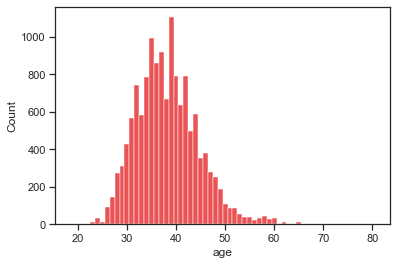

In [16]:
ax = sns.histplot(x=df["age"])

In [17]:
null_indexs = df[df.age.isna()].index
for i in null_indexs:
    df.loc[i, 'age'] = get_std_age(item=df.loc[i,'age'], age_list=df.age)

df.age.unique()    

array([32, 29, 37, 35, 34, 30, 42, 33, 31, 39, 43, 28, 24, 36, 26, 19, 27,
       25, 38, 23, 44, 41, 40, 21, 22, 45, 46, 48, 47, 49, 53, 51, 50, 52,
       38.26, 54, 60, 55, 56, 59, 57, 58, 62, 65, 80, 63], dtype=object)

### <span style='color:green'> **[done]** </span> statistics % pre-processing

In [18]:
df.head(3)

,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_update,last_match,url
0,Max Holloway,24,7,0,180.34,65.25,175.26,Orthodox,32,7.16,47%,4.79,59%,0.28,53%,84%,0.3,04-17-2023,04-15-2023,http://ufcstats.com/fighter-details/150ff4cc64...
1,Arnold Allen,19,2,0,172.72,65.25,177.8,Southpaw,29,3.34,40%,2.86,61%,1.12,50%,76%,0.3,04-17-2023,04-15-2023,http://ufcstats.com/fighter-details/040a74bb0a...
2,Edson Barboza,23,11,0,180.34,65.25,190.5,Orthodox,37,4.00,44%,4.12,58%,0.38,44%,75%,0.1,04-17-2023,04-15-2023,http://ufcstats.com/fighter-details/64a50dad70...


In [19]:
for column in ['str_acc','str_def','td_acc','td_def']:
    
    for i in range(0,len(df)):

        item = str(df.loc[i,column])
        df.loc[i,column] = float(item[0:item.find('%')])/100

df.head(3)

,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_update,last_match,url
0,Max Holloway,24,7,0,180.34,65.25,175.26,Orthodox,32,7.16,0.47,4.79,0.59,0.28,0.53,0.84,0.3,04-17-2023,04-15-2023,http://ufcstats.com/fighter-details/150ff4cc64...
1,Arnold Allen,19,2,0,172.72,65.25,177.8,Southpaw,29,3.34,0.4,2.86,0.61,1.12,0.5,0.76,0.3,04-17-2023,04-15-2023,http://ufcstats.com/fighter-details/040a74bb0a...
2,Edson Barboza,23,11,0,180.34,65.25,190.5,Orthodox,37,4.00,0.44,4.12,0.58,0.38,0.44,0.75,0.1,04-17-2023,04-15-2023,http://ufcstats.com/fighter-details/64a50dad70...


### <span style='color:green'> **[done]** </span> losses

In [20]:
null_indexs = df[df.losses.isna()].index
for i in null_indexs:
    df.loc[i,'losses'] = int(0)
    
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         14150 non-null  object 
 1   wins         14150 non-null  int64  
 2   losses       14150 non-null  int64  
 3   draws        14150 non-null  object 
 4   height       14150 non-null  float64
 5   weight       14150 non-null  object 
 6   reach        14150 non-null  object 
 7   stance       14150 non-null  object 
 8   age          14150 non-null  object 
 9   slpm         14150 non-null  float64
 10  str_acc      14150 non-null  object 
 11  sapm         14150 non-null  float64
 12  str_def      14150 non-null  object 
 13  td_avg       14150 non-null  float64
 14  td_acc       14150 non-null  object 
 15  td_def       14150 non-null  object 
 16  sub_avg      14150 non-null  float64
 17  last_update  14150 non-null  object 
 18  last_match   13348 non-null  object 
 19  url 

In [21]:
stat_df = df
stat_df.head(3)

,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_update,last_match,url
0,Max Holloway,24,7,0,180.34,65.25,175.26,Orthodox,32,7.16,0.47,4.79,0.59,0.28,0.53,0.84,0.3,04-17-2023,04-15-2023,http://ufcstats.com/fighter-details/150ff4cc64...
1,Arnold Allen,19,2,0,172.72,65.25,177.8,Southpaw,29,3.34,0.4,2.86,0.61,1.12,0.5,0.76,0.3,04-17-2023,04-15-2023,http://ufcstats.com/fighter-details/040a74bb0a...
2,Edson Barboza,23,11,0,180.34,65.25,190.5,Orthodox,37,4.00,0.44,4.12,0.58,0.38,0.44,0.75,0.1,04-17-2023,04-15-2023,http://ufcstats.com/fighter-details/64a50dad70...


## <span style='color:green'> **[done]** </span> ufc_fights_stats.csv exploration

In [22]:
file = 'ufc_matches_stats.csv'
df = pd.read_csv(loc+file)
df.tail(3)

,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,event_url
6440,win,Frank Hamaker,Thaddeus Luster,0,0,2,0,1,0,3,0,Open Weight,SUB,Keylock,1,4:52,03-11-1994,http://ufcstats.com/event-details/a6a9ab5a824e...
6441,win,Johnny Rhodes,David Levicki,0,0,11,4,1,0,0,0,Open Weight,KO/TKO,Punches,1,12:13,03-11-1994,http://ufcstats.com/event-details/a6a9ab5a824e...
6442,win,Patrick Smith,Ray Wizard,0,0,1,1,0,0,1,0,Open Weight,SUB,Guillotine Choke,1,0:58,03-11-1994,http://ufcstats.com/event-details/a6a9ab5a824e...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6443 entries, 0 to 6442
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   result        6443 non-null   object
 1   fighter       6443 non-null   object
 2   opponent      6443 non-null   object
 3   f_kd          6443 non-null   object
 4   o_kd          6443 non-null   object
 5   f_str         6443 non-null   object
 6   o_str         6443 non-null   object
 7   f_td          6443 non-null   object
 8   o_td          6443 non-null   object
 9   f_sub         6443 non-null   object
 10  o_sub         6443 non-null   object
 11  weight_class  6443 non-null   object
 12  method        6443 non-null   object
 13  type          3277 non-null   object
 14  round         6443 non-null   int64 
 15  time          6443 non-null   object
 16  date          6443 non-null   object
 17  event_url     6443 non-null   object
dtypes: int64(1), object(17)
memory usage: 906.2+ KB


### <span style='color:green'> **[done]** </span> type

In [24]:
null_indexs = df[df.type.isna()].index
for i in null_indexs:
    if df.loc[i,'method'] == 'U-DEC':
        df.loc[i,'type'] = 'Unanimous'
    elif df.loc[i,'method'] == 'S-DEC':
        df.loc[i,'type'] = 'Split'
    elif df.loc[i,'method'] == 'M-DEC':
        df.loc[i,'type'] = 'Majority'
    else:
        df.loc[i,'type'] = 'Other'
        
print(df.type.unique())        
df.info()   

['Unanimous' 'Knee' 'Punches' 'Rear Naked Choke' 'Armbar' 'Punch' 'Split'
 'Guillotine Choke' 'Elbows' 'Majority' 'Neck Crank' 'Other'
 'Triangle Choke' 'Inverted Triangle' 'Arm Triangle' 'Knees' 'Kneebar'
 'Flying Knee' 'Kick' 'Kimura' "D'Arce Choke" 'Triangle Armbar'
 'Von Flue Choke' 'Spinning Back Elbow' 'Spinning Back Fist' 'Elbow'
 'Keylock' 'Scarf Hold' 'Straight Armbar' 'Anaconda Choke' 'Heel Hook'
 'Ankle Lock' 'Slam' 'Forearm Choke' 'Injury' 'Spinning Back Kick'
 'Twister' 'Peruvian Necktie' 'Schultz Front Headlock' 'Bulldog Choke'
 'Suloev Stretch' 'Ezekiel Choke' 'Omoplata' 'Calf Slicer'
 'North-South Choke' 'Kicks' 'Pace/Pillory Choke' 'Other - Lock'
 'Toe Hold' 'Shoulder Choke' 'Headbutts' 'Headbutt' 'Gi Choke'
 'Other - Choke']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6443 entries, 0 to 6442
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   result        6443 non-null   object
 1   fighter  

### <span style='color:green'> **[done]** </span> date

In [25]:
df.date = pd.to_datetime(df.date, format='%m-%d-%Y')
df.head(3)

,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,event_url
0,win,Max Holloway,Arnold Allen,0,0,147,76,0,0,0,0,Featherweight,U-DEC,Unanimous,5,5:00,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...
1,win,Edson Barboza,Billy Quarantillo,1,0,21,19,0,0,0,0,Featherweight,KO/TKO,Knee,1,2:37,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...
2,win,Azamat Murzakanov,Dustin Jacoby,1,0,67,64,1,1,0,0,Light Heavyweight,U-DEC,Unanimous,3,5:00,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...


### <span style='color:green'> **[done]** </span> drop 'draw' & 'nc' rows

In [26]:
df.result.unique()

array(['win', 'draw', 'nc'], dtype=object)

In [27]:
df = df[df.result == 'win'].reset_index(drop=True)
df.tail(3)

,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,event_url
6332,win,Frank Hamaker,Thaddeus Luster,0,0,2,0,1,0,3,0,Open Weight,SUB,Keylock,1,4:52,1994-03-11,http://ufcstats.com/event-details/a6a9ab5a824e...
6333,win,Johnny Rhodes,David Levicki,0,0,11,4,1,0,0,0,Open Weight,KO/TKO,Punches,1,12:13,1994-03-11,http://ufcstats.com/event-details/a6a9ab5a824e...
6334,win,Patrick Smith,Ray Wizard,0,0,1,1,0,0,1,0,Open Weight,SUB,Guillotine Choke,1,0:58,1994-03-11,http://ufcstats.com/event-details/a6a9ab5a824e...


### <span style='color:green'> **[done]** </span> feature Win % column

In [28]:
df['f_win_perc'] = None
df['o_win_perc'] = None

i = 0
for fighter, opponent, date in tqdm(zip(df['fighter'], df['opponent'], df['date'])):
    #print('%d%% Completed' %(round((i/len(df))*100,2)), end ='\r')
    df.loc[i, 'f_win_perc'] = round(get_win_prob(name=fighter, date=date, df=df),2)
    df.loc[i, 'o_win_perc'] = round(get_win_prob(name=opponent, date=date, df=df),2)    
    i += 1

#print('100% Completed', end ='\r')    
df.head(3)

6335it [00:18, 347.55it/s]


,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,event_url,f_win_perc,o_win_perc
0,win,Max Holloway,Arnold Allen,0,0,147,76,0,0,0,0,Featherweight,U-DEC,Unanimous,5,5:00,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...,0.73,1.0
1,win,Edson Barboza,Billy Quarantillo,1,0,21,19,0,0,0,0,Featherweight,KO/TKO,Knee,1,2:37,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...,0.59,0.71
2,win,Azamat Murzakanov,Dustin Jacoby,1,0,67,64,1,1,0,0,Light Heavyweight,U-DEC,Unanimous,3,5:00,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...,1.0,0.8


### <span style='color:green'> **[done]** </span> feature Win/Lose streak column

In [29]:
df['f_win_strk'] = None
df['o_win_strk'] = None
df['f_lose_strk'] = None
df['o_lose_strk'] = None

for i in tqdm(range(len(df))):
    df.loc[i,'f_win_strk'] = get_win_streak(name=df.loc[i,'fighter'],date=df.loc[i,'date'],df=df)
    df.loc[i,'o_win_strk'] = get_win_streak(name=df.loc[i,'opponent'],date=df.loc[i,'date'],df=df)
    df.loc[i,'f_lose_strk'] = get_lose_streak(name=df.loc[i,'fighter'],date=df.loc[i,'date'],df=df)
    df.loc[i,'o_lose_strk'] = get_lose_streak(name=df.loc[i,'opponent'],date=df.loc[i,'date'],df=df)
    
df.head(3)    

100%|█████████████████████████████████████████████████████████████████████████████| 6335/6335 [00:44<00:00, 143.24it/s]


,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,event_url,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk
0,win,Max Holloway,Arnold Allen,0,0,147,76,0,0,0,0,Featherweight,U-DEC,Unanimous,5,5:00,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...,0.73,1.0,0,10,1,0
1,win,Edson Barboza,Billy Quarantillo,1,0,21,19,0,0,0,0,Featherweight,KO/TKO,Knee,1,2:37,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...,0.59,0.71,0,1,2,0
2,win,Azamat Murzakanov,Dustin Jacoby,1,0,67,64,1,1,0,0,Light Heavyweight,U-DEC,Unanimous,3,5:00,2023-04-15,http://ufcstats.com/event-details/15b1b21cd743...,1.0,0.8,1,0,0,1


In [30]:
main_df = df

# <span style='color:green'> **[done]** </span> Merge data frames
extracting data from fighters.csv(=stats_df) and add it to fights.csv(=main_df)

In [31]:
stat_df = stat_df.drop(['last_update','url'], axis=1)
stat_df.head(3)

,name,wins,losses,draws,height,weight,reach,stance,age,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,last_match
0,Max Holloway,24,7,0,180.34,65.25,175.26,Orthodox,32,7.16,0.47,4.79,0.59,0.28,0.53,0.84,0.3,04-15-2023
1,Arnold Allen,19,2,0,172.72,65.25,177.8,Southpaw,29,3.34,0.4,2.86,0.61,1.12,0.5,0.76,0.3,04-15-2023
2,Edson Barboza,23,11,0,180.34,65.25,190.5,Orthodox,37,4.00,0.44,4.12,0.58,0.38,0.44,0.75,0.1,04-15-2023


In [32]:
main_df = main_df.drop(['event_url'], axis=1)
main_df.head(3)

,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk
0,win,Max Holloway,Arnold Allen,0,0,147,76,0,0,0,0,Featherweight,U-DEC,Unanimous,5,5:00,2023-04-15,0.73,1.0,0,10,1,0
1,win,Edson Barboza,Billy Quarantillo,1,0,21,19,0,0,0,0,Featherweight,KO/TKO,Knee,1,2:37,2023-04-15,0.59,0.71,0,1,2,0
2,win,Azamat Murzakanov,Dustin Jacoby,1,0,67,64,1,1,0,0,Light Heavyweight,U-DEC,Unanimous,3,5:00,2023-04-15,1.0,0.8,1,0,0,1


In [33]:
df = main_df

### <span style='color:green'> **[done]** </span> add new empty columns:

In [34]:
original_columns_list = main_df.columns

f_column_list = ['f_' + column for column in stat_df.columns[1:]]
o_column_list = ['o_' + column for column in stat_df.columns[1:]]
new_column_list = f_column_list + o_column_list

for column in new_column_list:
    main_df[column] = None

main_df.columns 

Index(['result', 'fighter', 'opponent', 'f_kd', 'o_kd', 'f_str', 'o_str',
       'f_td', 'o_td', 'f_sub', 'o_sub', 'weight_class', 'method', 'type',
       'round', 'time', 'date', 'f_win_perc', 'o_win_perc', 'f_win_strk',
       'o_win_strk', 'f_lose_strk', 'o_lose_strk', 'f_wins', 'f_losses',
       'f_draws', 'f_height', 'f_weight', 'f_reach', 'f_stance', 'f_age',
       'f_slpm', 'f_str_acc', 'f_sapm', 'f_str_def', 'f_td_avg', 'f_td_acc',
       'f_td_def', 'f_sub_avg', 'f_last_match', 'o_wins', 'o_losses',
       'o_draws', 'o_height', 'o_weight', 'o_reach', 'o_stance', 'o_age',
       'o_slpm', 'o_str_acc', 'o_sapm', 'o_str_def', 'o_td_avg', 'o_td_acc',
       'o_td_def', 'o_sub_avg', 'o_last_match'],
      dtype='object')

In [35]:
main_df.head(2)

,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str_acc,f_sapm,f_str_def,f_td_avg,f_td_acc,f_td_def,f_sub_avg,f_last_match,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str_acc,o_sapm,o_str_def,o_td_avg,o_td_acc,o_td_def,o_sub_avg,o_last_match
0,win,Max Holloway,Arnold Allen,0,0,147,76,0,0,0,0,Featherweight,U-DEC,Unanimous,5,5:00,2023-04-15,0.73,1.0,0,10,1,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,win,Edson Barboza,Billy Quarantillo,1,0,21,19,0,0,0,0,Featherweight,KO/TKO,Knee,1,2:37,2023-04-15,0.59,0.71,0,1,2,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


### <span style='color:green'> **[done]** </span> add data to new stats columns:

In [36]:
no_stats_indexes = []

for i in tqdm(range(len(main_df))):
    fighter = main_df.loc[i,'fighter']
    opponent = main_df.loc[i,'opponent']
    event_data = main_df.loc[i,original_columns_list]
    
    try:
        additional_stats = pd.concat([get_fighter_stats(name=fighter, data=stat_df ),get_fighter_stats(name=opponent, data=stat_df)])
    except:
        no_stats_indexes.append(i)
        continue
    
    main_df.iloc[i] = pd.concat([event_data,additional_stats])
    
main_df.tail(3)

100%|██████████████████████████████████████████████████████████████████████████████| 6335/6335 [01:14<00:00, 85.33it/s]


,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str_acc,f_sapm,f_str_def,f_td_avg,f_td_acc,f_td_def,f_sub_avg,f_last_match,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str_acc,o_sapm,o_str_def,o_td_avg,o_td_acc,o_td_def,o_sub_avg,o_last_match
6332,win,Frank Hamaker,Thaddeus Luster,0,0,2,0,1,0,3,0,Open Weight,SUB,Keylock,1,4:52,1994-03-11,0,0,0,0,0,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6333,win,Johnny Rhodes,David Levicki,0,0,11,4,1,0,0,0,Open Weight,KO/TKO,Punches,1,12:13,1994-03-11,0,0,0,0,0,0,2,1,0,182.88,94.5,187.65,Orthodox,38.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03-11-1994,1,3,0,195.58,123.75,200.68,Orthodox,38.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03-11-1994
6334,win,Patrick Smith,Ray Wizard,0,0,1,1,0,0,1,0,Open Weight,SUB,Guillotine Choke,1,0:58,1994-03-11,0,0,0,0,0,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [37]:
# drop matches without additional statistics
main_df = main_df[~main_df.index.isin(no_stats_indexes)].reset_index(drop=True)
main_df.tail(3)

,result,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,weight_class,method,type,round,time,date,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str_acc,f_sapm,f_str_def,f_td_avg,f_td_acc,f_td_def,f_sub_avg,f_last_match,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str_acc,o_sapm,o_str_def,o_td_avg,o_td_acc,o_td_def,o_sub_avg,o_last_match
6319,win,Remco Pardoel,Alberta Cerra Leon,0,0,4,1,1,0,1,0,Open Weight,SUB,Ezekiel Choke,1,9:51,1994-03-11,0,0,0,0,0,0,9,6,1 (2 NC),190.5,117.0,195.47,Southpaw,38.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,09-08-1995,0,1,0,172.72,107.1,177.23,Orthodox,38.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03-11-1994
6320,win,Orlando Wiet,Robert Lucarelli,0,0,8,2,0,1,0,1,Open Weight,KO/TKO,Other,1,2:50,1994-03-11,0,0,0,0,0,0,1,5,0,177.8,76.5,182.44,Southpaw,38.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03-11-1994,0,1,0,187.96,110.25,192.86,Orthodox,38.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03-11-1994
6321,win,Johnny Rhodes,David Levicki,0,0,11,4,1,0,0,0,Open Weight,KO/TKO,Punches,1,12:13,1994-03-11,0,0,0,0,0,0,2,1,0,182.88,94.5,187.65,Orthodox,38.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03-11-1994,1,3,0,195.58,123.75,200.68,Orthodox,38.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03-11-1994


### <span style='color:green'> **[done]** </span> save to file

In [38]:
try:
    main_df.to_csv('../data/data_pre_processed.csv', index=0)
    print('../data/data_pre_processed.csv saved.')
except:
    print('error saving ../data/data_pre_processed.csv - might be file in use.')

../data/data_pre_processed.csv saved.
